### 1 : Importing Libraries

In [1]:
# ignore the warnings in the output
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries and packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import mlflow
from pycaret.classification import *

 ### 2 Reading Data

In [3]:
##Copy the cleaned data obtained from the data_cleaning notebook into the Data folder before proceeding
%time
dataset = pd.read_csv('Data/cleaned_data.csv')

CPU times: user 8 µs, sys: 2 µs, total: 10 µs
Wall time: 21.9 µs


In [4]:
dataset.head()

,created_date,city_tier,first_platform_c,first_utm_medium_c,first_utm_source_c,total_leads_droppped,referred_lead,app_complete_flag,assistance_interaction,career_interaction,payment_interaction,social_interaction,syllabus_interaction
0,2021-07-01 00:08:15,1.0,Level0,Level11,Level2,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
1,2021-07-01 00:16:43,2.0,Level3,Level0,others,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
2,2021-07-01 00:22:20,1.0,Level3,Level0,Level0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
3,2021-07-01 00:23:13,1.0,Level1,Level3,others,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,2021-07-01 00:28:38,1.0,Level3,Level0,Level0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [5]:
# drop the data column as it is not needed for training
dataset = dataset.drop(['created_date'], axis=1)

### 3 Setting up Environment: 

In [6]:
db_path = '/home/notebooks/Lead_Scoring/Model_Experimentation/'
db_file = 'lead_scoring_model_experimentation.db'

In [7]:
# create a connection and setup a SQLite database with the name "lead_scoring_model_experimentation.db" in 
# 'Assignment/02_training_pipeline/notebooks/' location
import sqlite3
from sqlite3 import Error

def create_connection(db_path, db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_path + db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()


In [8]:
create_connection(db_path, db_file)

2.6.0


In [9]:
# create a mlflow tracking uri at "http://0.0.0.0:6006"
mlflow.set_tracking_uri("http://0.0.0.0:6006")

In [10]:
# run below on terminal to start mlflow sserver
# mlflow server --backend-store-uri='sqlite://///home/notebooks/Lead_Scoring/Model_Experimentation/lead_scoring_model_experimentation.db' --default-artifact-root="/home/notebooks/Lead_Scoring/Model_Experimentation/mlruns/" --port=6006 --host=0.0.0.0

In [11]:
# setup pycaret 
Baseline_Model_01 = setup(data = dataset, target = 'app_complete_flag',
                    fold_shuffle = True, 
                    session_id = 42,
                    normalize = True,
                    transformation = True,
                    remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                    n_jobs = -1,                         
                    log_experiment = True,
                    experiment_name = 'Lead_Scoring_Baseline_Model_01',
                    log_plots = True,
                    log_data = True,
                    silent = True,
                    verbose = True,
                    log_profile = False)

,Description,Value
0,session_id,42
1,Target,app_complete_flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(238964, 12)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


2023/06/12 05:51:32 INFO mlflow.tracking.fluent: Experiment with name 'Lead_Scoring_Baseline_Model_01' does not exist. Creating a new experiment.


### 4 : Model Experimentation with pycaret

In [12]:
# create a experimentation with pycaret and exclude ['gbc','knn','qda', 'dummy', 'svm', 'ada']
best_model = compare_models(fold = 5,
                            exclude = ['gbc','knn','qda','dummy','svm','ada'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7382,0.8210,0.8276,0.7038,0.7607,0.4758,0.4835,8.2360
lightgbm,Light Gradient Boosting Machine,0.7382,0.8211,0.8325,0.7022,0.7618,0.4759,0.4845,1.5140
rf,Random Forest Classifier,0.7373,0.8186,0.8250,0.7037,0.7595,0.4742,0.4815,2.7540
et,Extra Trees Classifier,0.7366,0.8178,0.8203,0.7044,0.7579,0.4726,0.4793,3.4320
dt,Decision Tree Classifier,0.7363,0.8169,0.8199,0.7043,0.7577,0.4721,0.4787,0.1860
lr,Logistic Regression,0.7174,0.7917,0.8028,0.6875,0.7407,0.4342,0.4405,1.2080
lda,Linear Discriminant Analysis,0.7151,0.7904,0.8138,0.6814,0.7417,0.4295,0.4380,0.4280
ridge,Ridge Classifier,0.7150,0.0000,0.8138,0.6814,0.7417,0.4294,0.4378,0.0860
nb,Naive Bayes,0.6789,0.7383,0.8537,0.6343,0.7278,0.3565,0.3804,0.4580


In [13]:
# create a model which gives the highest accuracy
# select the model --
lightgbm = create_model('lightgbm')

In [14]:
lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
%matplotlib inline

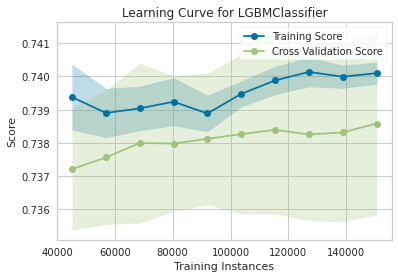

In [16]:
plot_model(lightgbm, plot = 'learning')

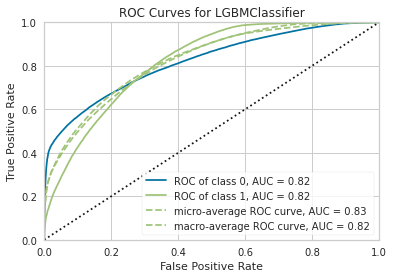

In [22]:
plot_model(lightgbm, plot = 'auc')

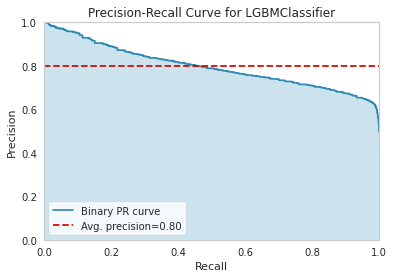

In [23]:
plot_model(lightgbm, plot = 'pr')

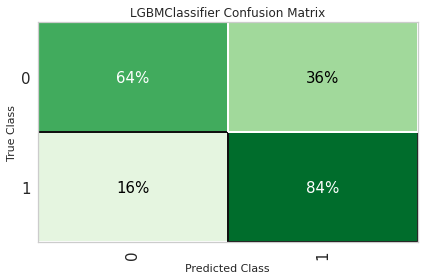

In [24]:
plot_model(lightgbm, plot = 'confusion_matrix', plot_kwargs = {'percent': True})

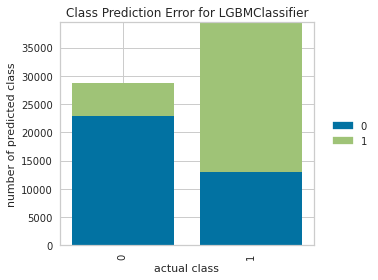

In [25]:
plot_model(lightgbm, plot = 'error')

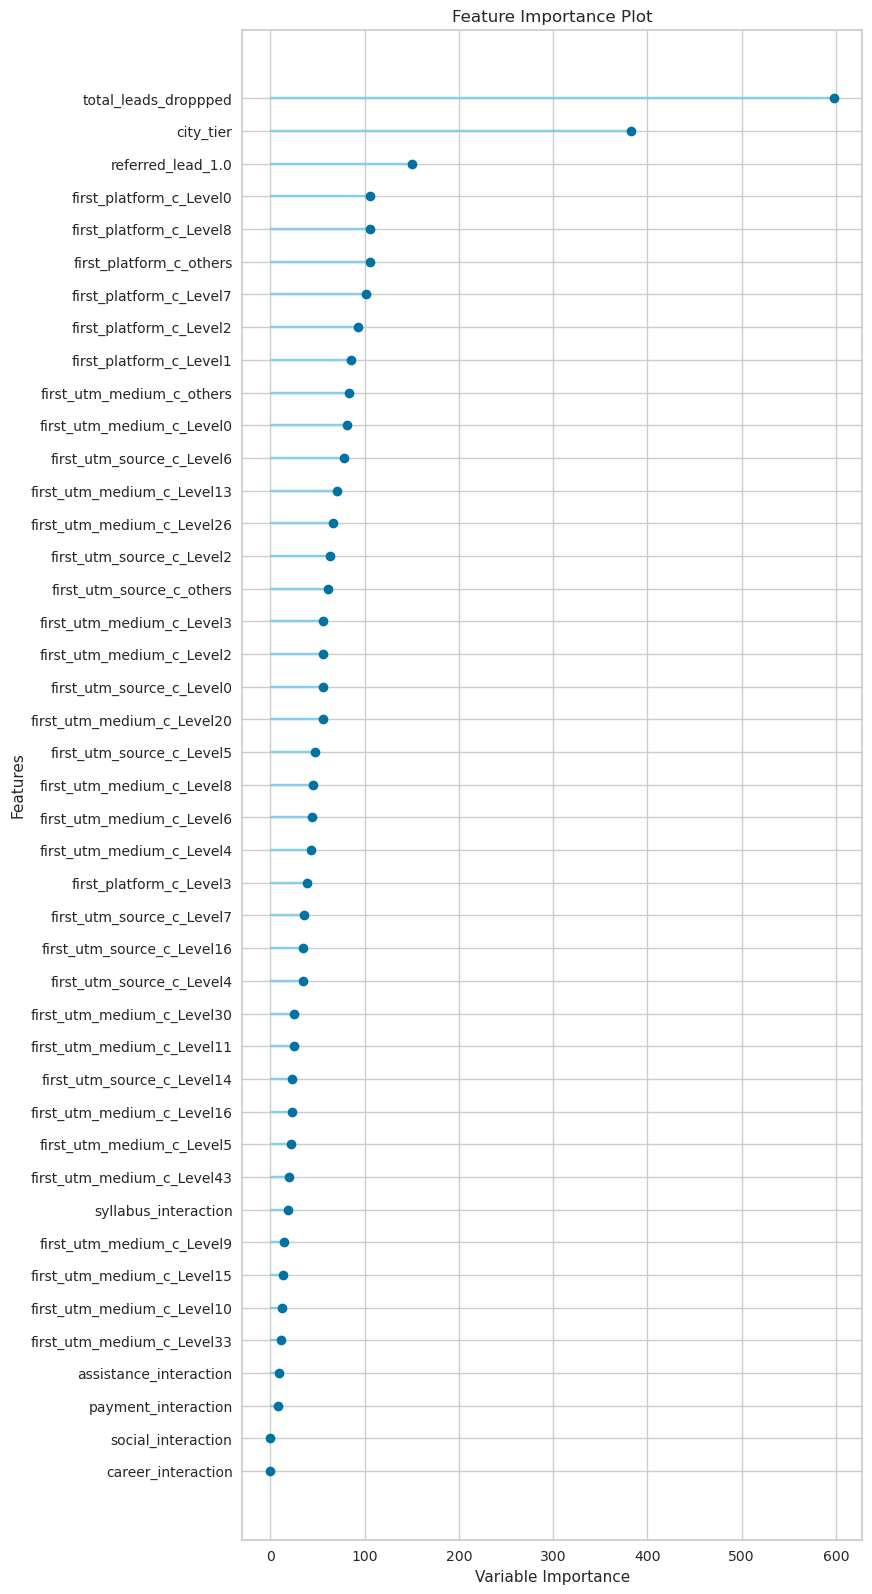

In [26]:
# create feature importance plot
plot_model(lightgbm, plot = 'feature_all')

In [27]:
xgboost = create_model('xgboost')

In [28]:
xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

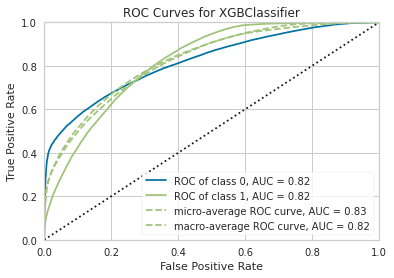

In [29]:
plot_model(xgboost, plot = 'auc')

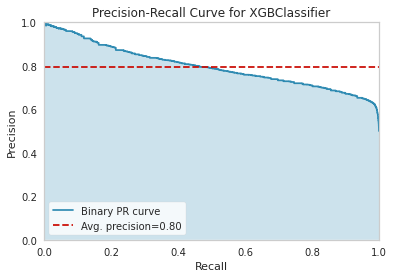

In [30]:
plot_model(xgboost, plot = 'pr')

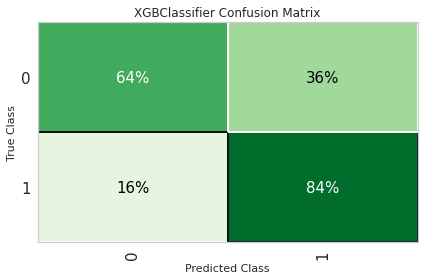

In [31]:
plot_model(xgboost, plot = 'confusion_matrix', plot_kwargs = {'percent': True})

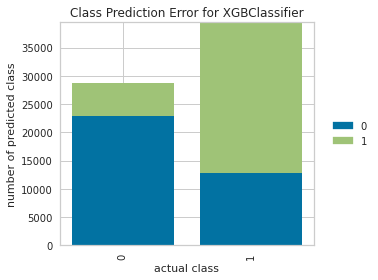

In [32]:
plot_model(xgboost, plot = 'error')

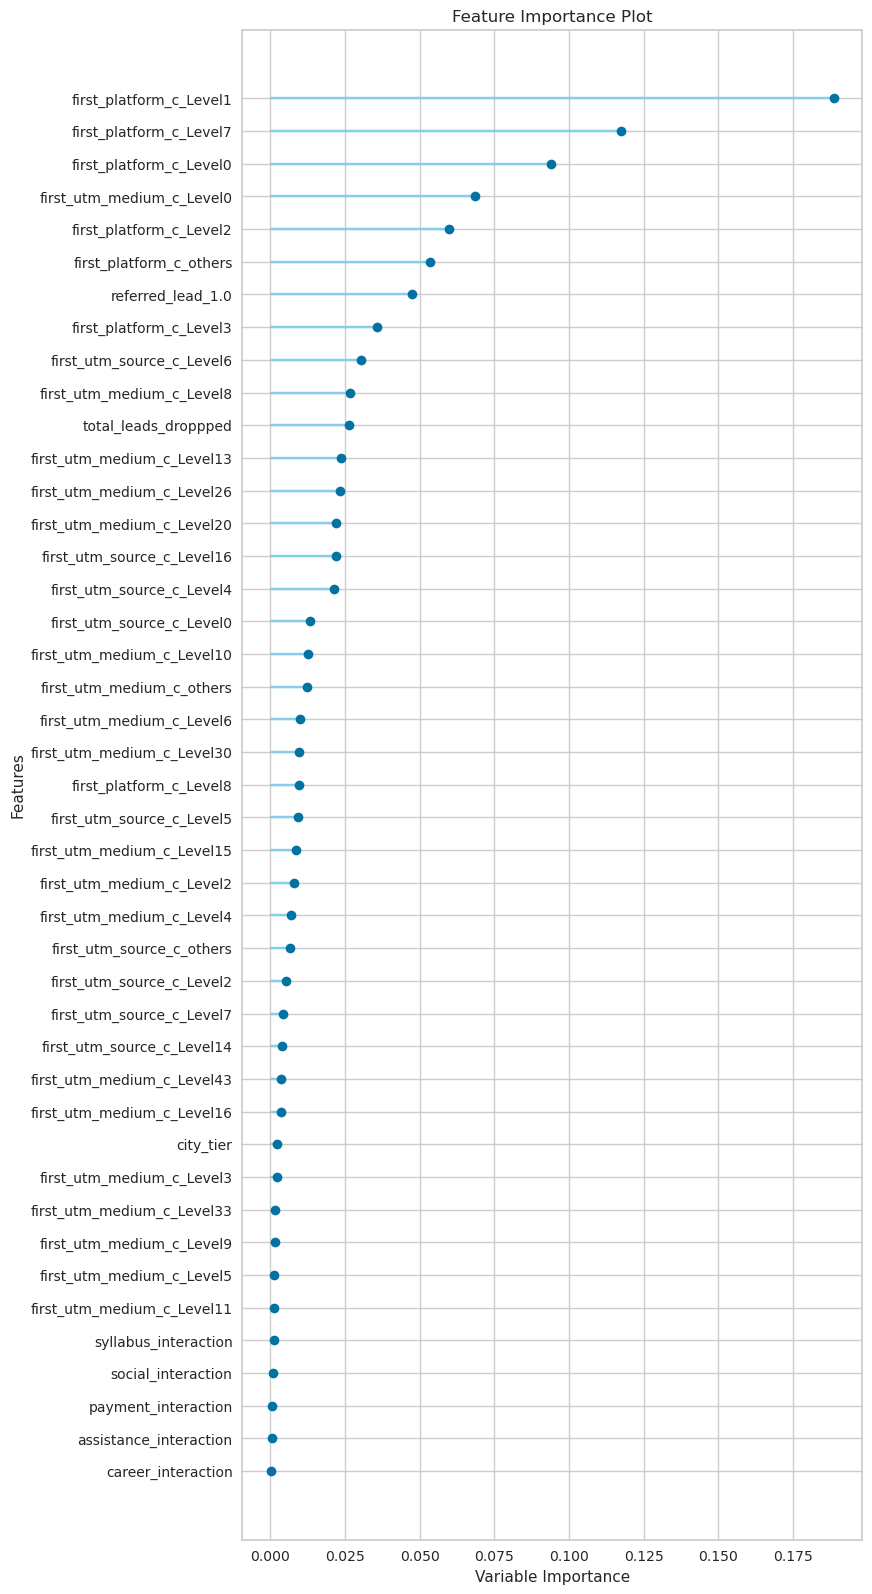

In [33]:
plot_model(xgboost, plot = 'feature_all')

### 5 : Model Experimentation after dropping features

From the above feature tests we can claerly see that some of the features are not significant. We will now drop all the insignificant features and select only the significant ones.
The list of the significant features is 
['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c'].
So now you will train your model with onlly these features.

Also note that in our previous experiments we saw that tree based models are our top performers. In case of tree based models we do not require transformationss normalization, scaling etc. So make sure that you use setup pycaret in the proper way. i.e, make sure that you use normalize = False and transformation = False.

In [34]:
# 
# ['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c']
#
# Train the model using the features listed above. Since we are using tree models we do not require any transformaions 
# such as normalization, scaling etc.So make sure that you use setup pycaret in the proper way. i.e, make sure that you use 
# normalize = False and transformation = False.
cols = ['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c']
dataset_cols = dataset[cols]

In [35]:
from pycaret.classification import *
#removed
#categorical_feature = ['city_tier', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c'],

Tuned_Model_Exp01 = setup(data = dataset_cols, target = 'app_complete_flag',
                    fix_imbalance = False,
                    remove_multicollinearity = True,
                    multicollinearity_threshold = 0.95,                    
                    fold_shuffle = True,
                    session_id = 42,
                    n_jobs = -1,
                    log_experiment = True,
                    experiment_name = 'Tuned_Model_Exp01',
                    log_plots = True,
                    log_data = True,
                    silent = True,
                    verbose = True,
                    log_profile = False)

,Description,Value
0,session_id,42
1,Target,app_complete_flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(238964, 7)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


2023/06/12 06:01:29 INFO mlflow.tracking.fluent: Experiment with name 'Tuned_Model_Exp01' does not exist. Creating a new experiment.


In [36]:
# create a experimentation with pycaret and exclude ['gbc','knn','qda', 'dummy', 'svm', 'ada']. 
best_model2 = compare_models(fold = 10, exclude = ['gbc','knn','qda', 'dummy', 'svm', 'ada'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7384,0.8210,0.8333,0.7020,0.7621,0.4761,0.4848,1.5600
xgboost,Extreme Gradient Boosting,0.7380,0.8209,0.8312,0.7023,0.7613,0.4754,0.4837,8.9390
rf,Random Forest Classifier,0.7369,0.8187,0.8233,0.7038,0.7588,0.4732,0.4803,3.2960
et,Extra Trees Classifier,0.7364,0.8178,0.8203,0.7042,0.7578,0.4723,0.4790,4.0170
dt,Decision Tree Classifier,0.7362,0.8170,0.8200,0.7041,0.7576,0.4718,0.4785,0.1630
lr,Logistic Regression,0.7099,0.7834,0.8225,0.6731,0.7403,0.4190,0.4299,0.7530
ridge,Ridge Classifier,0.7002,0.0000,0.7958,0.6699,0.7275,0.3997,0.4070,0.0550
lda,Linear Discriminant Analysis,0.7002,0.7725,0.7958,0.6699,0.7275,0.3997,0.4070,0.4790
nb,Naive Bayes,0.6694,0.7336,0.8577,0.6247,0.7229,0.3373,0.3640,0.0560


In [37]:
# You should get lightgbm as the best performing model. So now we will train a lightGBM model manually using pycaret
lightgbm_fs = create_model('lightgbm')

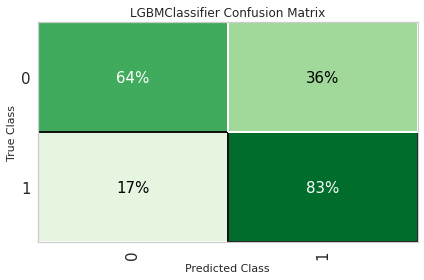

In [38]:
plot_model(lightgbm_fs, plot = 'confusion_matrix', plot_kwargs = {'percent': True})

In [41]:
!pip install optuna==3.0.0

     |████████████████████████████████| 348 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 41.6 MB 37.2 MB/s eta 0:00:01
     |████████████████████████████████| 80 kB 18.9 MB/s eta 0:00:01
  Using cached cmaes-0.9.1-py3-none-any.whl (21 kB)
     |████████████████████████████████| 147 kB 46.0 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 58.8 MB/s eta 0:00:01
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=d4cb8ab87865c50d187adb208d94644122dc8e8dbc141062d39a48f34fb3bed0
  Stored in directory: /home/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.3
    Uninstalling scipy-1.5.3:
      Successfully uninstalled scipy-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are 

In [42]:
#pycaret --version
pycaret.__version__

'2.3.8'

In [43]:
import optuna

In [44]:
optuna.__version__

'3.0.0'

In [46]:
# Tune the hyper parameters of the lightgbm model using optuna on 10 folds and optimise AUC as that was our system metric, 
# hence we will optimise AUC

tuned_lgbm_optuna,tuner_1 = tune_model(lightgbm_fs,
                                       search_library = 'optuna',
                                       search_algorithm = 'random',
                                       fold = 10,
                                       optimize = 'auc',
                                       choose_better = True,
                                       return_tuner = True)

In [47]:
tuned_lgbm_optuna

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [48]:
# Print the final models configuration so that we can use it in the model retraining pipeline
print(tuned_lgbm_optuna)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
[LightGBM] [Warning] bagging_fraction is set=0.9326440579823765, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9326440579823765
[LightGBM] [Warning] feature_fraction is set=0.8889381242628354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8889381242628354
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9326440579823765, subsample=1.0 will be ignored. Current value: bagging_fraction=0.93